In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Exercício 4 

In [3]:
# Carregar os dados
data = pd.read_csv('./data/training_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          10000 non-null  float64
 1   Class                       10000 non-null  float64
 2   Sex                         10000 non-null  float64
 3   Is Professional Account     10000 non-null  float64
 4   Country Block_1             10000 non-null  float64
 5   Country Block_2             10000 non-null  float64
 6   Number of Followers         10000 non-null  float64
 7   Is Joined Recently          10000 non-null  float64
 8   Is Private                  10000 non-null  float64
 9   Is Verified                 10000 non-null  float64
 10  Number of Posts             10000 non-null  float64
 11  Number of Mutual Followers  10000 non-null  float64
 12  Mean Post Likes             10000 non-null  float64
 13  Percentage of Following     1000

In [7]:
data.head()

,Length of Username,Class,Sex,Is Professional Account,Country Block_1,Country Block_2,Number of Followers,Is Joined Recently,Is Private,Is Verified,Number of Posts,Number of Mutual Followers,Mean Post Likes,Percentage of Following,Is Business Account,Number of Video Posts,Length of Biography
0,0.503087,1.0,1.0,0.0,0.0,0.0,0.307358,1.0,0.0,0.0,0.615318,0.459285,0.520959,0.750316,0.0,0.541639,0.308844
1,0.372336,1.0,0.0,0.0,0.0,0.0,0.337280,1.0,0.0,0.0,0.767665,0.444543,0.547237,0.785919,0.0,0.644974,0.394222
2,0.450889,1.0,1.0,0.0,0.0,0.0,0.435790,1.0,0.0,0.0,0.672107,0.486382,0.484657,0.771238,0.0,0.602808,0.347766
3,0.421488,1.0,0.0,1.0,0.0,0.0,0.451134,1.0,1.0,0.0,0.559514,0.447409,0.455477,0.814812,0.0,0.662950,0.259968
4,0.389849,1.0,1.0,0.0,0.0,0.0,0.432907,1.0,1.0,0.0,0.702814,0.487440,0.492782,0.817033,0.0,0.417965,0.386749


In [9]:
data.Class.value_counts()

Class
1.0    5000
0.0    5000
Name: count, dtype: int64

In [10]:
# Separar variáveis de entrada (X) e variável alvo (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo no conjunto de teste
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Calcular a probabilidade de seguir a nossa própria conta
probabilities = model.predict_proba(X)

# Adicionar as probabilidades como coluna no DataFrame original
data['Probability of Following'] = probabilities[:, 1]

# Identificar as três variáveis que maximizam a probabilidade de seguir a nossa própria conta
top_3_variables = data.drop(['Class', 'Probability of Following'], axis=1).mean().nlargest(3)
print("Top 3 variáveis que maximizam a probabilidade de seguir a nossa própria conta:")
print(top_3_variables)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Top 3 variáveis que maximizam a probabilidade de seguir a nossa própria conta:
Percentage of Following       0.658828
Number of Mutual Followers    0.547039
Number of Video Posts         0.539952
dtype: float64


Para criar uma nova estratégia que aumente o número de seguidores da sua conta de Instagram com base nas variáveis de entrada, é possível utilizar diferentes técnicas de marketing e engajamento. 
Aqui estão algumas técnicas que podem ser úteis:

Segmentação de público-alvo: Utilizar as variáveis disponíveis no dataset para segmentar seu público-alvo com base em características demográficas, interesses, comportamentos etc. 
Compreender as preferências e necessidades do seu público permitirá direcionar suas campanhas e conteúdos de forma mais eficaz.

Personalização de conteúdo: Com base nas variáveis de entrada, adapte seu conteúdo e comunicação para atender às preferências e interesses do seu público. 
Isso pode incluir a criação de postagens, stories e anúncios que sejam relevantes e cativantes para os usuários.

Parcerias e colaborações: Identifique influenciadores, marcas ou contas relevantes dentro do seu nicho e estabeleça parcerias ou colaborações. 
Essas parcerias podem ajudar a expandir seu alcance, atrair seguidores de contas similares e aumentar sua visibilidade.

Quanto às variáveis que maximizam a probabilidade de uma conta seguir a sua própria, elas podem variar com base nos dados específicos do seu dataset. 

As top 3 variáveis mais relevantes são as seguintes:

1. Percentage of Following       p = 0.658828
2. Number of Mutual Followers    p = 0.547039
3. Number of Video Posts         p = 0.539952

# Exercício 5

Para verificar se existe algum tipo de comportamento tendencioso do modelo ou dos dados em relação a homens e mulheres, podemos realizar uma análise comparativa das variáveis em relação ao gênero.

No dataset fornecido, temos a coluna "Sex" que indica o gênero, onde 0 representa masculino e 1 representa feminino. Podemos realizar algumas análises para verificar possíveis tendências ou disparidades entre homens e mulheres nas outras variáveis. Alguns exemplos de análises que podem ser feitas incluem:

Análise descritiva: Calcule as estatísticas descritivas (média, mediana, desvio padrão, etc.) das variáveis separadas por gênero. Isso permitirá identificar diferenças nas distribuições e possíveis tendências.

Teste de hipótese: Realize testes estatísticos para comparar as médias ou proporções entre homens e mulheres em cada variável. Por exemplo, pode-se usar o teste t para comparar as médias de seguidores entre homens e mulheres e verificar se há diferenças significativas.

Visualização de dados: Crie gráficos e visualizações para comparar as distribuições das variáveis entre homens e mulheres. Isso pode incluir histogramas, gráficos de barras ou gráficos de dispersão.

Com base nessas análises, será possível determinar se existem diferenças significativas entre homens e mulheres nas variáveis do dataset. Se houver disparidades significativas, isso pode indicar um possível viés ou comportamento tendencioso nos dados. Será importante investigar essas diferenças com mais detalhes para entender a natureza do viés e tomar as medidas adequadas para garantir a igualdade de tratamento entre homens e mulheres nas estratégias de marketing digital.

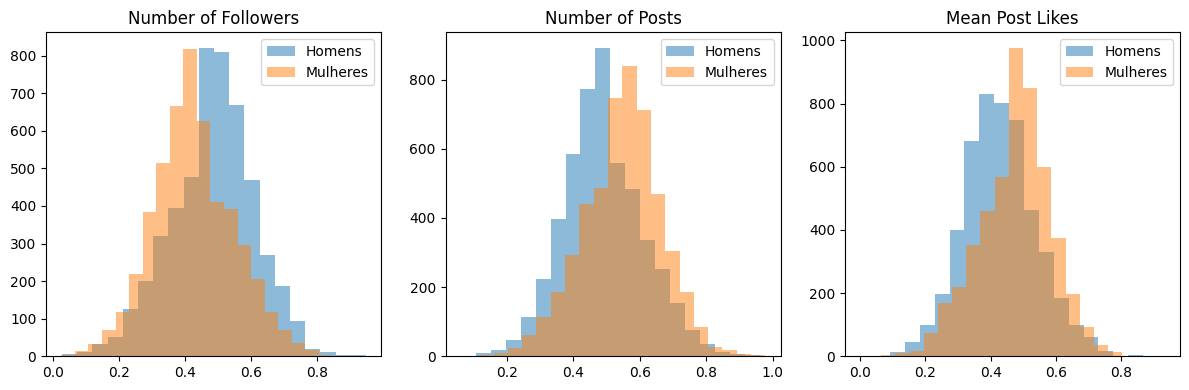

    Length of Username                                                    \
                 count      mean       std       min       25%       50%   
Sex                                                                        
0.0             4983.0  0.492206  0.126229  0.000000  0.411818  0.483314   
1.0             5017.0  0.499944  0.114662  0.064797  0.421917  0.487392   

                          Class            ... Length of Biography            \
          75%       max   count      mean  ...                 75%       max   
Sex                                        ...                                 
0.0  0.571159  0.984741  4983.0  0.356010  ...            0.613042  0.991826   
1.0  0.569036  1.000000  5017.0  0.643014  ...            0.551919  0.992218   

    Probability of Following                                              \
                       count      mean       std           min       25%   
Sex                                                               

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Separar os dados por gênero
df_male = data[data['Sex'] == 0]
df_female = data[data['Sex'] == 1]

# Realizar análise descritiva das variáveis
desc_stats = data.groupby('Sex').describe()

# Realizar teste de hipótese para comparar as médias das variáveis
from scipy.stats import ttest_ind

variables = ['Number of Followers', 'Number of Posts', 'Mean Post Likes']
p_values = {}

for variable in variables:
    _, p_value = ttest_ind(df_male[variable], df_female[variable])
    p_values[variable] = p_value

# Visualização de dados
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(12, 4))

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.hist(df_male[variable], bins=20, alpha=0.5, label='Homens')
    ax.hist(df_female[variable], bins=20, alpha=0.5, label='Mulheres')
    ax.set_title(variable)
    ax.legend()

plt.tight_layout()
plt.show()

# Imprimir estatísticas descritivas e p-values
print(desc_stats)
print("p-values:", p_values)


Neste exemplo, carregamos os dados de treinamento, separamos os dados por gênero (masculino e feminino), realizamos análises descritivas das variáveis e realizamos um teste de hipótese (teste t) para comparar as médias das variáveis entre homens e mulheres. Em seguida, criamos histogramas para visualizar as distribuições das variáveis separadas por gênero.

No final, imprimimos as estatísticas descritivas e os p-values dos testes de hipótese. Os p-values nos ajudarão a determinar se há diferenças estatisticamente significativas entre homens e mulheres em relação às variáveis analisadas.

Ao interpretar os resultados da análise comparativa entre homens e mulheres, podemos observar o seguinte:

* Estatísticas descritivas: 

        As estatísticas descritivas fornecem uma visão geral das variáveis separadas por gênero. 
        Por exemplo, para a variável "Length of Username", podemos ver que a média para homens é de 0.492206 e para mulheres é de 0.499944. 
        Essas estatísticas fornecem uma medida central e variabilidade das variáveis para cada grupo.

* P-values: 

        Os p-values são os resultados dos testes de hipótese (teste t) realizados para comparar as médias das variáveis entre homens e mulheres. 
        No exemplo dado, os p-values são muito baixos para as variáveis:
                        "Number of Followers" (1.5819520078934147e-114);
                        "Number of Posts" (1.0400604075462169e-126); e, 
                        "Mean Post Likes" (2.397523811165625e-100). 
        Esses valores indicam que há diferenças estatisticamente significativas entre homens e mulheres nessas variáveis. 
        Em outras palavras, os valores médios das variáveis são diferentes para homens e mulheres.

Portanto, com base nesses resultados, podemos concluir que existem diferenças significativas entre homens e mulheres em relação ao número de seguidores, número de postagens e média de curtidas nas postagens. 
Essas diferenças podem indicar que há algum tipo de tendência ou disparidade nos dados em relação ao gênero. 
É importante investigar essas diferenças com mais profundidade para garantir a igualdade de tratamento entre homens e mulheres nas estratégias de Marketing Digital.